In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import time

# 读取数据
#data = pd.read_csv(r"E:\大学\综合项目实践\013minmax.csv")
data=pd.read_csv(r"E:\大学\综合项目实践\归一&特征选择&bp\Z-Score标准化.csv")
# 将日期列转换为日期类型
data['Date'] = pd.to_datetime(data['Date'])

data.head()

,Date,Discharge,Dayl,Prcp,Srad,Swe,Tmax,Tmin,Vp,Prcp_lag_1,...,Tmax_lag_6,Srad_lag_6,Discharge_lag_6,Prcp_lag_7,Tmax_lag_7,Srad_lag_7,Discharge_lag_7,Year,Month,Day
0,2000-01-08,49.0,-1.375809,-0.269642,-1.184460,NaN,-0.992849,-0.729902,-0.836319,-0.507515,...,-0.501052,-0.781345,-0.532577,-0.508870,-0.997933,-0.857839,-0.531815,-1.421237,-1.61127,-0.885057
1,2000-01-09,46.0,-1.375809,-0.507515,-1.134343,NaN,-1.058464,-0.751663,-0.847891,-0.269642,...,-0.075040,-1.073961,-0.487535,-0.508870,-0.501400,-0.781438,-0.531815,-1.421237,-1.61127,-0.771299
2,2000-01-10,83.0,-1.331552,-0.507515,-1.269985,NaN,-0.760459,-0.350065,-0.583796,-0.507515,...,-0.078697,-1.324472,-0.190256,-0.162309,-0.075277,-1.074070,-0.486761,-1.421237,-1.61127,-0.657542
3,2000-01-11,120.0,-1.331552,1.941103,-1.862290,NaN,-0.700312,-0.016719,-0.321015,-0.507515,...,-0.061327,-0.978066,-0.064138,0.643647,-0.078935,-1.324593,-0.189405,-1.421237,-1.61127,-0.543785
4,2000-01-12,79.0,-1.331552,-0.347589,-1.359452,NaN,-0.762282,-0.338195,-0.575617,1.941103,...,-1.386900,-0.832023,-0.388442,1.362291,-0.061561,-0.978170,-0.063254,-1.421237,-1.61127,-0.430027


In [2]:
# 设定特征和目标变量
features =['Prcp','Discharge_lag_1','Discharge_lag_2','Discharge_lag_3','Discharge_lag_4','Discharge_lag_5']
X = data[features]
y = data['Discharge']

# 分割训练集和测试集（前80%作为训练集，后20%作为测试集）
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
time1=time.time()

In [3]:
# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# 基学习器
base_learners = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=200)),
   # ('svr', SVR(C=1.0, gamma='scale')),#去除后性能提高
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ('xgb', XGBRegressor(n_estimators=100))
]

# 使用梯度提升回归作为元学习器
meta_learner = GradientBoostingRegressor(n_estimators=50)

# 构建StackingRegressor
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

# 训练StackingRegressor
stacking_regressor.fit(X_train, y_train)
# 预测并评估性能
y_pred = stacking_regressor.predict(X_test)


In [4]:
# # 特征标准化
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)

# # 定义基学习器
# lr = LinearRegression()
# rf = RandomForestRegressor()
# knn = KNeighborsRegressor()
# xgb = XGBRegressor()

# # 定义超参数网格
# param_grid_lr = {}
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }
# param_grid_knn = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance']
# }
# param_grid_xgb = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 6, 9]
# }

# # 使用GridSearchCV进行调参
# gs_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
# gs_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1)
# gs_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1)

# # 拟合模型
# gs_rf.fit(X_train, y_train)
# gs_knn.fit(X_train, y_train)
# gs_xgb.fit(X_train, y_train)

# # 获取最佳模型
# best_rf = gs_rf.best_estimator_
# best_knn = gs_knn.best_estimator_
# best_xgb = gs_xgb.best_estimator_

# # 构建调参后的基学习器列表
# base_learners_tuned = [
#     ('lr', lr),
#     ('rf', best_rf),
#     ('knn', best_knn),
#     ('xgb', best_xgb)
# ]

# # 定义元学习器及其参数网格
# meta_learner = GradientBoostingRegressor()
# param_grid_meta = {
#     'final_estimator__n_estimators': [50, 100, 150],
#     'final_estimator__learning_rate': [0.01, 0.1, 0.2],
#     'final_estimator__max_depth': [3, 5, 7]
# }

# # 构建StackingRegressor
# stacking_regressor = StackingRegressor(estimators=base_learners_tuned, final_estimator=meta_learner)

# # 使用GridSearchCV对StackingRegressor进行调参
# gs_stacking = GridSearchCV(estimator=stacking_regressor, param_grid=param_grid_meta, cv=5, n_jobs=-1)
# gs_stacking.fit(X_train, y_train)

# # 获取最佳StackingRegressor模型
# best_stacking_regressor = gs_stacking.best_estimator_

# # 预测并评估性能
# y_pred = best_stacking_regressor.predict(X_test)

In [5]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 2025.7613432690544
Mean Absolute Error (MAE): 18.079346197059905
R² Score: 0.7585943967858639


In [6]:
time2=time.time()
print(time2-time1)


5.071004867553711


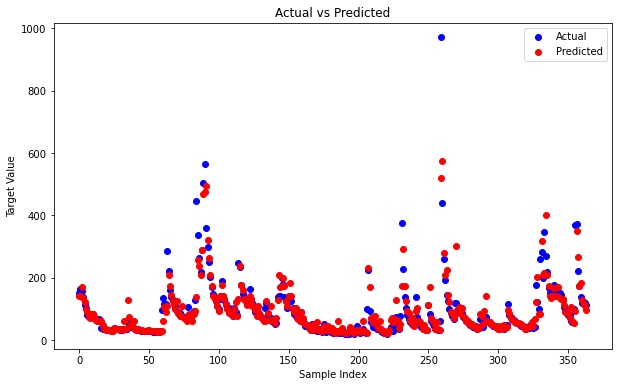

In [7]:
import matplotlib.pyplot as plt
# 假设 y_test 是测试集的实际目标值，y_pred 是模型预测的目标值
# 这里假设 y_test 和 y_pred 都是一维数组，包含了每个样本的目标值

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制预测结果和实际结果的对比图
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')  # 实际结果用蓝色散点表示
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='Predicted')  # 预测结果用红色散点表示

# 添加图例和标签
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')

# 显示图形
plt.show()

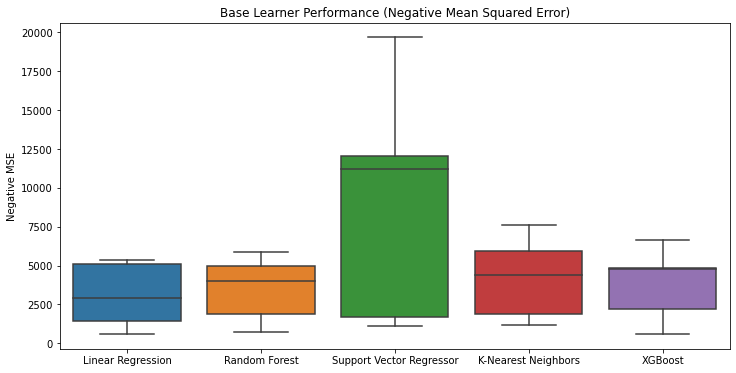

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# 基学习器
base_learners = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(n_estimators=200)),
    ('Support Vector Regressor', SVR(C=1.0, gamma='scale')),
    ('K-Nearest Neighbors', KNeighborsRegressor(n_neighbors=5)),
    ('XGBoost', XGBRegressor(n_estimators=100))
]

# 存储评估结果
results = {}

# 评估每个基学习器
for name, model in base_learners:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    results[name] = scores

# 转换为DataFrame便于可视化
results_df = pd.DataFrame(results).abs()

# 可视化每个基学习器的MSE
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df)
plt.title('Base Learner Performance (Negative Mean Squared Error)')
plt.ylabel('Negative MSE')
plt.show()


# '''Linear Regression：

# 性能较为稳定，负MSE中位数较小，表现较好。
# Random Forest：

# 性能也较为稳定，负MSE中位数较小，表现优异。
# Support Vector Regressor (SVR)：

# 性能波动较大，中位数负MSE较高，表现较差，离群值较多，意味着模型可能不太稳定。
# K-Nearest Neighbors (KNN)：

# 性能中等，负MSE中位数适中，表现尚可。
# XGBoost：

# 性能较好，负MSE中位数较低，表现优秀。
# 总结
# 从图中可以看出，Random Forest和XGBoost表现最好，负MSE值较低且稳定，说明它们是优秀的基学习器。
# Support Vector Regressor表现较差，负MSE值较高且不稳定，可能不适合作为基学习器。
# 线性回归和K近邻表现中等，可以作为集成的一部分，但可能需要进一步调优。
# 通过这种方式，能够直观地比较不同基学习器的性能，从而选择表现较好的基学习器用于集成学习。'''

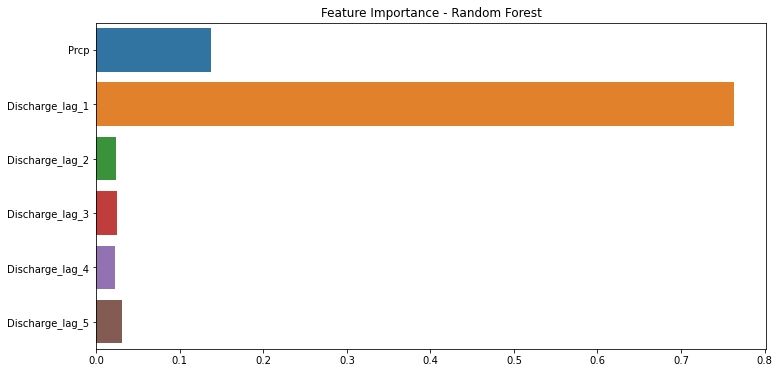

In [9]:
# 训练随机森林
rf_model = RandomForestRegressor(n_estimators=200)
rf_model.fit(X_train, y_train)

# 提取特征重要性
importances = rf_model.feature_importances_
feature_names = X.columns

# 可视化特征重要性
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance - Random Forest')
plt.show()


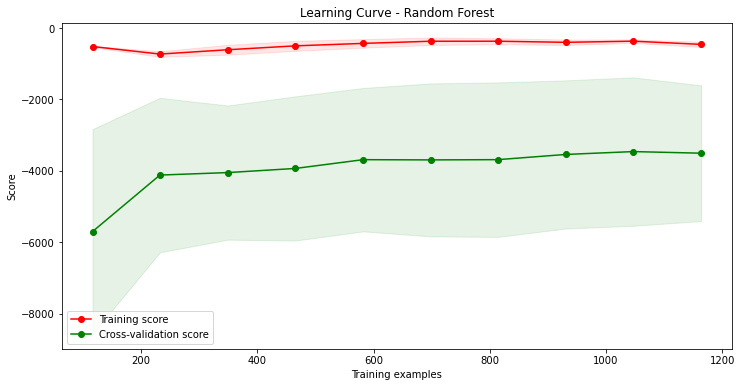

In [10]:
from sklearn.model_selection import learning_curve

# 计算学习曲线
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(n_estimators=200), X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# 平均和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 可视化学习曲线
plt.figure(figsize=(12, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()
